### Index
* Imbalanced datasets
* The metric trap
* Confusion matrix
* Resampling
* Random under-sampling
* Random over-sampling
* Python imbalanced-learn module
* Random under-sampling and over-sampling with imbalanced-learn
* Under-sampling: Tomek links
* Under-sampling: Cluster Centroids
* Over-sampling: SMOTE
* Over-sampling followed by under-sampling
* Recommended reading

#### 1. Imbalanced Dataset

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

Class 0:  573518
Class 1:  21694
Proportion :  26.44 : 1


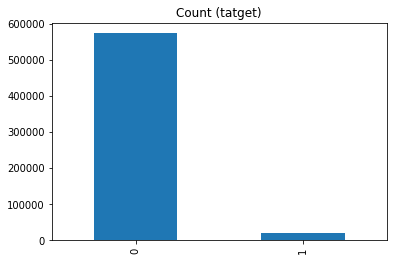

In [5]:
df_train = pd.read_csv('./datasets/porto-seguro-safe-driver-prediction/train.csv')

target_count = df_train.target.value_counts()
print('Class 0: ', target_count[0])
print('Class 1: ', target_count[1])
print('Proportion : ', round(target_count[0] / target_count[1], 2),  ': 1')

target_count.plot(kind='bar', title='Count (tatget)')

### Metric Trap

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
labels = df_train.columns[2:]

X = df_train[labels]
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.2f%%" % (accuracy * 100.0))

Accuracy : 96.36%


In [13]:
model = XGBClassifier()
model.fit(X_train[['ps_calc_01']], y_train)
y_pred = model.predict(X_test[['ps_calc_01']])

accuracy = accuracy_score(y_test, y_pred)
print('Accuravy : %.2f%% ' % (accuracy * 100))

Accuravy : 96.36% 


* 두 가지 비교를 볼 때 정확도는 중요한 부분이 아님.  
이런 경우 Normalized Gini Metric이나 Robust한 메트릭이 필요함

#### Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Confusion Matrix: 
 [[114709      0]
 [  4334      0]]


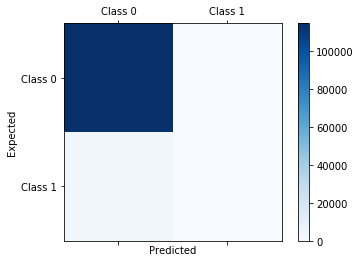

In [16]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion Matrix: \n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Resampling

In [17]:
# Class Count
count_class_0, count_class_1 = df_train.target.value_counts()

# Divide by class
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

Random Under Sampling: 
1    21694
0    21694
Name: target, dtype: int64


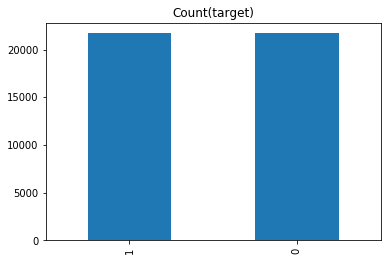

In [19]:
### Random under-Sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random Under Sampling: ')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count(target)')

### Random over sampling

Random Over Sampliing: 
1    573518
0    573518
Name: target, dtype: int64


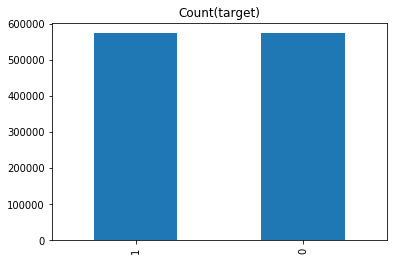

In [20]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random Over Sampliing: ')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count(target)')

### Python imbalanced-learn module

In [21]:
import imblearn

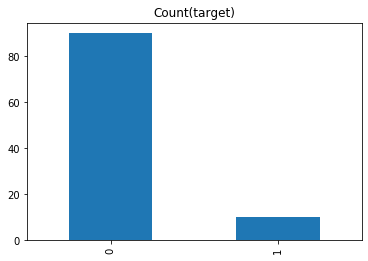

In [22]:
from sklearn.datasets import make_classification

X, y = make_classification(\
                          n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
                          n_informative=3, n_redundant=1, flip_y=0,
                          n_features=20, n_clusters_per_class=1,
                          n_samples=100, random_state=10)

df = pd.DataFrame(X)
df['target'] = y

df.target.value_counts().plot(kind='bar', title='Count(target)')

In [26]:
def plot_2d_space(X, y, label='Classes'):
    colors=['#1F77B4', '#FF7F0E']
    markers=['o', 's']
    
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(\
                   X[y==l, 0],
                   X[y==l, 1],
                   c=c, label=l, marker=m)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [24]:
from sklearn.decomposition import PCA

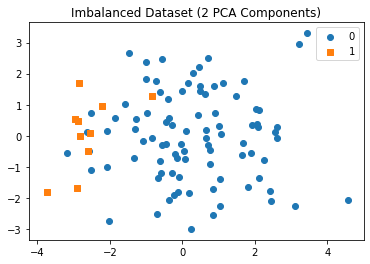

In [27]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced Dataset (2 PCA Components)')

### Random under sampling and over sampling with imbalanced-learn

In [28]:
from imblearn.under_sampling import RandomUnderSampler

Removed indices:  [18 47 83 64 98 37 53 17 72 24  4  8  9 14 16 40 67 70 71 74]


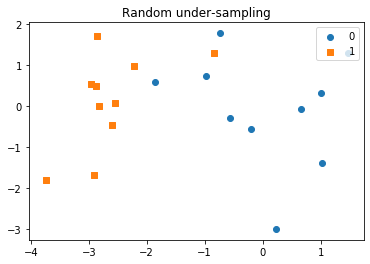

In [31]:
rus = RandomUnderSampler(return_indices=True)

ros = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = ros.fit_sample(X, y)

print('Removed indices: ', id_rus)
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

80 new random picked points


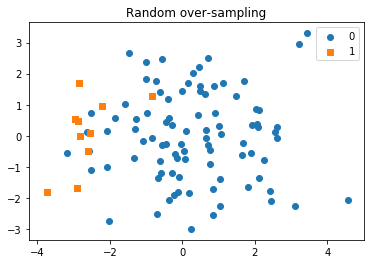

In [33]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')
plot_2d_space(X_ros, y_ros, 'Random over-sampling')

### Under Sampling : Tomek Links
* Pairs of very close instances, but of opposite classes

In [34]:
from imblearn.under_sampling import TomekLinks

Removed indices:  [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90 91 92 93 94 95 97 98 99]


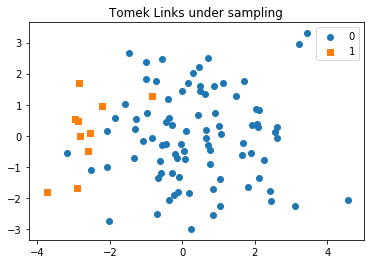

In [35]:
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indices: ', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek Links under sampling')

### Under Sampling : Cluster Centroids
* generating centroids based on clustering methods

In [36]:
from imblearn.under_sampling import ClusterCentroids

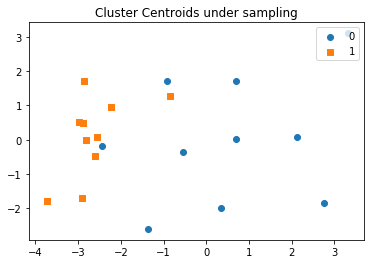

In [37]:
cc = ClusterCentroids(ratio={0 : 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under sampling')

### Over Sampling : SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

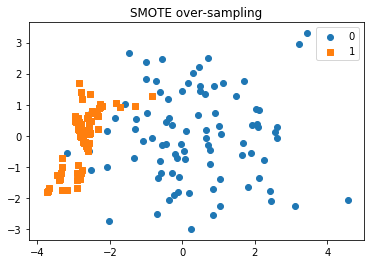

In [39]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

### Over Sampling followed by Under Sampling

In [40]:
from imblearn.combine import SMOTETomek

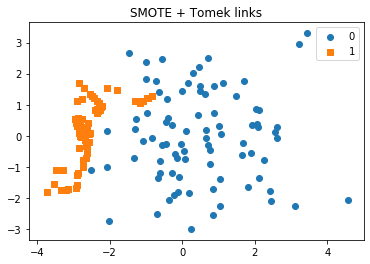

In [41]:
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')